In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os, os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm, Normalize
from matplotlib import ticker

In [2]:
mid_scen = 'Mid Case'#######,'Mid Case',"Mid Case 95 by 2050","Mid Case 95 by 2035"]
mult_scen = "Mismatch_10Y"

In [3]:
cmap1 = sns.color_palette("gray", as_cmap=True)
cmap = sns.color_palette("Oranges", as_cmap=True)

In [4]:
color_list = ["midnightblue","royalblue","mediumaquamarine"]
mid_case_list = ['Mid Case','Mid Case 95 by 2050','Mid Case 95 by 2035']

orig_scen = ["Low_RE_Cost","Mid_Case","High_RE_Cost","Low_Trans","High_Trans",
             "Electrification_EnhancedFlex","Electrification","High_NG_Price","High_Demand_Growth","Low_Everything",
             "Low_NG_Price","Low_Nuclear_CCS_Cost","PTC_ITC_Ext","Reduced_RE_Resource",
            "Mid_Case_Base_Flex","Low_Demand_Growth"]
scen = orig_scen.copy()
for os in orig_scen:
    new1 = os+"_95_by_2050"
    new2 = os+"_95_by_2035"
    scen += [new1]
    scen += [new2]

analysis = ["v6.2jedi_mid","v6.2jedi_high","v6.2jedi_low",
            "v6.2nei_mid","v6.2nei_high","v6.2nei_low"]
analysis_name = analysis

i = 0
for s in scen:
    for a in analysis:
        fpath = r"analysis/2_JEDI_to_demographics/output/Dist_detailedjobzones_StdScen21_"+s+"_annual_state_"+a+".csv"
        job_data = pd.read_csv(fpath)
        job_data["Scenario"] = s.replace("_"," ")
        job_data["analysis"] = a
        if "2035" in s:
            job_data["ems_target"] = "95% by 2035"
        elif "2050" in s:
            job_data["ems_target"] = "95% by 2050"
        else:
            job_data["ems_target"] = "BAU"

        if i == 0:
            job_data_compiled = job_data.copy()
        else:
            job_data_compiled = job_data_compiled.append(job_data)
        i = i+1
job_data_compiled.head()

,index,2022,2050,Type,state,Retire,Remaining,Mismatch_1Y,Mismatch_5Y,Mismatch_10Y,MismatchMult_1y,MismatchMult_5y,MismatchMult_10y,Scenario,analysis,ems_target
0,Agriculture,0.539151,1.742939,1,AL,0.387831,0.151320,1.591619,1.500629,1.406960,2.952087,2.783321,2.609587,Low RE Cost,v6.2jedi_mid,BAU
1,Mining,0.000000,0.000000,1,AL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Low RE Cost,v6.2jedi_mid,BAU
2,Construction,0.000000,8.595279,1,AL,0.000000,0.000000,8.595279,20.863912,12.605718,inf,inf,inf,Low RE Cost,v6.2jedi_mid,BAU
3,Manufacturing,4.765846,6.362750,1,AL,3.285405,1.480441,4.882309,6.551173,5.446524,1.024437,1.374609,1.142824,Low RE Cost,v6.2jedi_mid,BAU
4,Fabricated Metals,0.000076,0.001255,1,AL,0.000053,0.000022,0.001233,0.001180,0.001131,16.294978,15.601380,14.950377,Low RE Cost,v6.2jedi_mid,BAU


In [5]:
# this is the mid case scenario only to show in heatmaps!
job_data_all = job_data_compiled.query("Scenario==@mid_scen").query("analysis=='v6.2jedi_mid'")
mid_name = job_data_all["ems_target"].iloc[0]
job_data_all.head()

,index,2022,2050,Type,state,Retire,Remaining,Mismatch_1Y,Mismatch_5Y,Mismatch_10Y,MismatchMult_1y,MismatchMult_5y,MismatchMult_10y,Scenario,analysis,ems_target
0,Agriculture,0.539127,0.955232,1,AL,0.387814,0.151313,0.803919,0.719892,0.636677,1.491148,1.335292,1.180939,Mid Case,v6.2jedi_mid,BAU
1,Mining,0.000000,0.000000,1,AL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mid Case,v6.2jedi_mid,BAU
2,Construction,0.000000,0.000000,1,AL,0.000000,0.000000,0.000000,1.619839,2.921370,0.000000,inf,inf,Mid Case,v6.2jedi_mid,BAU
3,Manufacturing,4.770611,4.381073,1,AL,3.288690,1.481921,2.899152,2.883646,2.832245,0.607711,0.604460,0.593686,Mid Case,v6.2jedi_mid,BAU
4,Fabricated Metals,0.000076,0.000606,1,AL,0.000053,0.000022,0.000583,0.000470,0.000361,7.713090,6.216822,4.777976,Mid Case,v6.2jedi_mid,BAU


### JEDI Sectors

In [6]:
job_data_jedi = job_data_all.copy()
job_data_jedi = job_data_jedi.groupby(["state","index"]).sum()
job_data_jedi = job_data_jedi.reset_index()
job_data_jedi["MismatchMult"] = job_data_jedi[mult_scen]/job_data_jedi["2022"]
job_data_jedi["MismatchMult"] = job_data_jedi["MismatchMult"].replace(np.nan,0)
job_data_jedi_pivot = job_data_jedi.pivot(index="state",values="MismatchMult",columns="index")
job_data_jedi_pivot = job_data_jedi_pivot.replace(np.inf,100000)
job_data_jedi_pivot.head(10)

index,Agriculture,Construction,Electrical Equipment,FIRE,Fabricated Metals,Government,Machinery,Manufacturing,Mining,Misc. Services,Professional Services,Retail Trade,TCPU,Wholesale Trade
state,,,,,,,,,,,,,,
AL,1.180939,100000.000000,2.670871,0.718995,4.777976,0.911905,0.716961,0.593686,0.298022,0.503768,0.643794,0.603244,0.424657,0.611951
AR,0.998234,100000.000000,3.138673,1.024782,6.159674,3.629611,0.865929,0.872544,0.722627,0.454182,0.707275,0.620196,0.764197,0.703311
AZ,0.361172,0.392346,3.720596,0.640277,-0.049423,0.598809,0.657626,0.894279,3.445219,0.467527,0.681287,1.056654,1.271296,0.820950
CA,0.562261,100000.000000,2.030895,0.776779,-0.052244,2.965121,4.954587,2.354286,-0.055285,1.706021,0.533257,2.112562,1.266305,1.028016
CO,0.994456,79.279051,3.243577,0.746000,-0.244169,1.702077,0.183117,1.145069,0.143938,1.026499,0.539860,1.419134,0.870022,1.361656
CT,-0.027102,100000.000000,2.108427,0.778275,2.092535,1.102165,0.753989,0.445525,2.122931,0.447546,0.585289,0.486462,0.852254,0.637307
DE,2.026362,0.000000,3.822734,0.529054,4.047151,0.670870,0.461216,1.655349,4.011862,0.363311,0.514013,1.809685,1.889697,1.212946
FL,0.501131,100000.000000,8.790652,0.844764,5.612593,1.789614,0.771382,1.107250,0.056397,0.573375,0.754593,1.543239,1.404831,0.955485
GA,0.743186,100000.000000,2.634653,0.854391,2.376113,1.655501,0.760329,0.938852,2.690888,0.535093,0.702037,0.571761,0.790197,0.744919


In [7]:
job_data_jedi_pivot.min().min()

-0.3112661192651497

The JEDI sector with the highest employment growth marked by a star

In [8]:
job_data_jedi_pivot_hl = job_data_jedi_pivot.copy()
job_data_jedi_pivot_hl["high_jedi"] = job_data_jedi_pivot_hl.idxmax(axis=1)
jedi_list = job_data_jedi_pivot.columns
job_data_jedi_pivot_hl['high_jedi_list'] = job_data_jedi_pivot_hl['high_jedi'].apply(lambda d: list(jedi_list).index(d))
job_data_jedi_pivot_hl.head()

index,Agriculture,Construction,Electrical Equipment,FIRE,Fabricated Metals,Government,Machinery,Manufacturing,Mining,Misc. Services,Professional Services,Retail Trade,TCPU,Wholesale Trade,high_jedi,high_jedi_list
state,,,,,,,,,,,,,,,,
AL,1.180939,100000.000000,2.670871,0.718995,4.777976,0.911905,0.716961,0.593686,0.298022,0.503768,0.643794,0.603244,0.424657,0.611951,Construction,1
AR,0.998234,100000.000000,3.138673,1.024782,6.159674,3.629611,0.865929,0.872544,0.722627,0.454182,0.707275,0.620196,0.764197,0.703311,Construction,1
AZ,0.361172,0.392346,3.720596,0.640277,-0.049423,0.598809,0.657626,0.894279,3.445219,0.467527,0.681287,1.056654,1.271296,0.820950,Electrical Equipment,2
CA,0.562261,100000.000000,2.030895,0.776779,-0.052244,2.965121,4.954587,2.354286,-0.055285,1.706021,0.533257,2.112562,1.266305,1.028016,Construction,1
CO,0.994456,79.279051,3.243577,0.746000,-0.244169,1.702077,0.183117,1.145069,0.143938,1.026499,0.539860,1.419134,0.870022,1.361656,Construction,1


In [9]:
# the sector with the largest starting size
job_data_all_maxsector = job_data_all.copy().groupby(["state","index"]).sum().reset_index()
job_data_all_maxsector = job_data_all_maxsector.pivot(index="state",values="2022",columns="index")
job_data_all_maxsector["high_jedi"] = job_data_all_maxsector.idxmax(axis=1)
jedi_list2 = job_data_all_maxsector.columns
job_data_all_maxsector['high_jedi_list'] = job_data_all_maxsector['high_jedi'].apply(lambda d: list(jedi_list2).index(d))
job_data_all_maxsector.head()

index,Agriculture,Construction,Electrical Equipment,FIRE,Fabricated Metals,Government,Machinery,Manufacturing,Mining,Misc. Services,Professional Services,Retail Trade,TCPU,Wholesale Trade,high_jedi,high_jedi_list
state,,,,,,,,,,,,,,,,
AL,0.920711,0.000000,116.097648,1150.575035,0.001155,10.419804,239.827145,72.857048,2798.917715,296.526560,2949.972622,145.691353,7037.334701,483.882404,TCPU,12
AR,1.465985,0.000000,50.388294,627.194972,0.000636,6.624300,105.364594,35.340319,3.140658,187.905651,1087.292859,79.508487,2269.890107,156.687304,TCPU,12
AZ,3.097009,122.620362,217.481168,1123.873323,24.287991,23.619372,186.948231,54.158080,0.024030,290.600169,2242.718398,140.348607,3968.050526,330.476853,TCPU,12
CA,65.069427,0.000000,1168.808997,2370.925604,101.638442,31.809018,116.902390,308.874726,188.416831,772.059553,2981.628332,414.236014,14959.360341,760.196427,TCPU,12
CO,4.945552,1.212312,98.396229,573.062353,2.778147,12.557520,17.869270,35.612930,1144.010759,244.874648,439.306864,180.214247,2907.439295,183.117820,TCPU,12


The national employment growth across scenarios in each JEDI sector

In [10]:
natl_jedi = job_data_compiled.copy().query("ems_target==@mid_name")
natl_jedi = natl_jedi.groupby(["Scenario","analysis","index"]).sum()
natl_jedi = natl_jedi.reset_index()
natl_jedi["MismatchMult"] = natl_jedi[mult_scen]/natl_jedi["2022"]
natl_jedi = natl_jedi.pivot(columns=["Scenario","analysis"],index="index",values="MismatchMult")
natl_jedi_orig_col = natl_jedi.columns
natl_jedi["max"] = natl_jedi[natl_jedi_orig_col].max(axis=1)
natl_jedi["min"] = natl_jedi[natl_jedi_orig_col].min(axis=1)
natl_jedi["top"] = natl_jedi["max"]-natl_jedi["min"]
natl_jedi["mid_case"] = natl_jedi[[(mid_scen,"v6.2jedi_mid")]]
natl_jedi = natl_jedi.loc[list(jedi_list)][::-1]
natl_jedi.head()

Scenario              Electrification                                         \
analysis                v6.2jedi_high v6.2jedi_low v6.2jedi_mid v6.2nei_high   
index                                                                          
Wholesale Trade              1.063629     1.051888     1.059489     1.188140   
TCPU                         1.304727     1.291751     1.295747     1.186903   
Retail Trade                 2.038727     2.026915     2.032388     1.201179   
Professional Services        0.522592     0.522135     0.522608     0.474944   
Misc. Services               1.008771     1.030235     1.012057     0.745649   

Scenario                                      Electrification EnhancedFlex  \
analysis              v6.2nei_low v6.2nei_mid                v6.2jedi_high   
index                                                                        
Wholesale Trade          1.174091    1.183124                     1.053326   
TCPU                     1.180194    1.181282                     1.324295   
Retail Trade             1.197341    1.198763                     2.030824   
Professional Services    0.474343    0.474969                     0.504150   
Misc. Services           0.758597    0.748731                     0.969316   

Scenario                                                      ...  \
analysis              v6.2jedi_low v6.2jedi_mid v6.2nei_high  ...   
index                                                         ...   
Wholesale Trade           1.041788     1.049258     1.174674  ...   
TCPU                      1.310069     1.314795     1.202831  ...   
Retail Trade              2.019096     2.024518     1.196792  ...   
Professional Services     0.503753     0.504164     0.448543  ...   
Misc. Services            0.991629     0.972997     0.732137  ...   

Scenario              Reduced RE Resource                            \
analysis                    v6.2jedi_high v6.2jedi_low v6.2jedi_mid   
index                                                                 
Wholesale Trade                  0.819556     0.814527     0.817767   
TCPU                             0.913106     0.900600     0.906354   
Retail Trade                     1.206603     1.200148     1.203291   
Professional Services            0.430520     0.430734     0.430616   
Misc. Services                   0.675444     0.685353     0.677559   

Scenario                                                         max  \
analysis              v6.2nei_high v6.2nei_low v6.2nei_mid             
index                                                                  
Wholesale Trade           0.865979    0.859835    0.863769  1.188140   
TCPU                      0.865728    0.857023    0.860891  1.324295   
Retail Trade              0.822796    0.820655    0.821551  2.038727   
Professional Services     0.342474    0.342878    0.342616  0.525954   
Misc. Services            0.632365    0.636669    0.633396  1.032715   

Scenario                    min       top  mid_case  
analysis                                             
index                                                
Wholesale Trade        0.765312  0.422828  0.854532  
TCPU                   0.779055  0.545240  0.868079  
Retail Trade           0.710492  1.328235  1.221259  
Professional Services  0.288382  0.237572  0.433921  
Misc. Services         0.613983  0.418732  0.746416  

[5 rows x 100 columns]

In [11]:
state_total = job_data_jedi.copy().groupby(["state"]).sum()
job_data_jedi_renorm = job_data_jedi.copy().set_index("state")
job_data_jedi_renorm["state_sum"] = state_total["2022"]
job_data_jedi_renorm["perc"] = job_data_jedi_renorm[mult_scen]/job_data_jedi_renorm["state_sum"]
job_data_jedi_renorm = job_data_jedi_renorm.reset_index()
job_data_jedi_renorm_us = job_data_jedi_renorm.copy().groupby("index").sum()
job_data_jedi_renorm_us["perc"] = job_data_jedi_renorm_us[mult_scen]/job_data_jedi_renorm_us["state_sum"]
job_data_jedi_renorm_us = job_data_jedi_renorm_us.reset_index()
job_data_jedi_renorm_us["state"] = "US"
job_data_jedi_renorm = job_data_jedi_renorm.append(job_data_jedi_renorm_us)
job_data_jedi_renorm_pivot = job_data_jedi_renorm.pivot(columns="state",index="index",values="perc")
job_data_jedi_renorm_pivot

state,AL,AR,AZ,CA,CO,CT,DE,FL,GA,IA,...,TN,TX,US,UT,VA,VT,WA,WI,WV,WY
index,,,,,,,,,,,,,,,,,,,,,
Agriculture,7.105157e-05,3.173843e-04,0.000128,0.001509,0.000841,-9.133748e-04,0.000300,0.001173,1.656046e-03,0.000998,...,1.393397e-04,0.001045,0.000376,-5.317575e-05,-0.000336,1.076698e-03,6.300179e-05,1.565921e-03,7.218417e-05,3.738520e-05
Construction,9.029099e-03,1.978676e-01,0.005512,0.169604,0.016442,5.303104e-02,0.000000,0.050331,5.820345e-02,0.003167,...,9.803938e-02,0.039976,0.066887,3.721620e-02,0.028941,5.166712e-01,3.733708e-02,1.915716e-01,1.580327e-01,-2.189579e-02
Electrical Equipment,2.026278e-02,3.430039e-02,0.092705,0.097926,0.054599,3.298267e-02,0.168198,0.119130,3.335906e-02,0.094569,...,4.751431e-02,0.064816,0.038463,2.256426e-02,0.021149,6.361772e-02,3.674947e-02,8.152489e-02,1.343223e-02,3.348592e-04
FIRE,5.405842e-02,1.393983e-01,0.082443,0.075977,0.073135,4.705514e-02,0.024668,0.083139,8.749399e-02,0.089365,...,9.345802e-02,0.085622,0.061209,3.499608e-02,0.010512,1.193054e-01,2.133288e-01,9.764910e-02,3.820639e-02,7.173782e-03
Fabricated Metals,3.605955e-07,8.490948e-07,-0.000138,-0.000219,-0.000116,4.252531e-07,0.000005,0.000001,2.803683e-07,0.000003,...,6.701913e-07,0.000003,-0.000065,4.482499e-07,-0.000163,6.359948e-07,6.102753e-08,5.934888e-07,6.642900e-08,9.852843e-10
Government,6.209146e-04,5.214629e-03,0.001620,0.003891,0.003657,5.278601e-03,0.000346,0.001908,3.328615e-04,0.006658,...,3.707720e-03,0.008753,0.003365,8.342693e-04,0.000095,1.100762e-02,2.378978e-03,5.154937e-03,3.760219e-03,5.559092e-04
Machinery,1.123612e-02,1.978793e-02,0.014085,0.023895,0.000560,2.229433e-02,0.001010,0.011500,1.941333e-02,0.002276,...,1.920069e-02,0.006176,0.009098,1.381911e-03,0.007559,-1.634099e-05,3.510707e-03,1.099520e-02,2.268118e-03,6.738439e-05
Manufacturing,2.826514e-03,6.687769e-03,0.005549,0.029999,0.006976,3.550873e-03,0.009267,0.009161,5.926093e-03,0.012172,...,7.465976e-03,0.011009,0.007481,4.048498e-03,0.002392,4.200061e-02,1.763022e-02,1.128438e-02,5.526887e-04,-5.510171e-04
Mining,5.450816e-02,4.922187e-04,0.000009,-0.000430,0.028170,1.301830e-06,0.000005,0.002990,1.468652e-06,0.000006,...,2.914657e-03,0.023454,0.044601,1.124885e-01,0.001880,4.626862e-06,1.440840e-07,7.317597e-07,-5.349056e-02,6.729773e-02


### Job Zone

In [13]:
job_data_zone = job_data_all.copy()
job_data_zone = job_data_zone.groupby(["state","Type"]).sum()
job_data_zone = job_data_zone.reset_index()
job_data_zone["MismatchMult"] = job_data_zone[mult_scen]/job_data_zone["2022"]
job_data_zone["MismatchMult"] = job_data_zone["MismatchMult"].replace(np.nan,0)
job_data_zone["MismatchMult"] = job_data_zone["MismatchMult"].replace(np.inf,10000)
job_data_zone_pivot = job_data_zone.pivot(index="state",values="MismatchMult",columns="Type")
job_data_zone_pivot_col = job_data_zone_pivot.columns
job_data_zone_pivot.head()

Type,1,2,3,4,5
state,,,,,
AL,0.782552,0.446169,0.593444,0.584440,0.571153
AR,1.607292,0.988171,1.234148,0.851262,0.728053
AZ,0.734201,1.156615,0.999271,0.870735,0.704945
CA,2.065562,1.480931,1.493100,1.110898,0.765092
CO,0.297688,0.800267,0.952377,0.827201,0.505854


In [14]:
job_data_zone_pivot.min().min()

-0.28622328904051886

In [15]:
job_data_zone_pivot_hl = job_data_zone_pivot.copy()
job_data_zone_pivot_hl["high_zone"] = job_data_zone_pivot_hl.idxmax(axis=1)
job_data_zone_pivot_hl.head()

Type,1,2,3,4,5,high_zone
state,,,,,,
AL,0.782552,0.446169,0.593444,0.584440,0.571153,1
AR,1.607292,0.988171,1.234148,0.851262,0.728053,1
AZ,0.734201,1.156615,0.999271,0.870735,0.704945,2
CA,2.065562,1.480931,1.493100,1.110898,0.765092,1
CO,0.297688,0.800267,0.952377,0.827201,0.505854,3


In [16]:
# largest zone
job_data_all_maxzone = job_data_all.copy().groupby(["state","Type"]).sum().reset_index()
job_data_all_maxzone = job_data_all_maxzone.pivot(index="state",values="2022",columns="Type")
job_data_all_maxzone["high_zone"] = job_data_all_maxzone.idxmax(axis=1)
job_data_all_maxzone.head()

Type,1,2,3,4,5,high_zone
state,,,,,,
AL,85.934849,8834.526419,2594.295055,3331.362187,456.905392,2
AR,52.565602,2381.974650,899.438703,1084.856920,191.968293,2
AZ,70.260648,3943.048429,1793.155558,2573.068642,348.770841,2
CA,309.877491,12813.883388,4066.349660,6284.471534,765.344029,2
CO,382.445885,3108.271507,838.293693,1349.062647,167.324215,2


In [17]:
natl_jobzone = job_data_compiled.copy().query("ems_target==@mid_name")
natl_jobzone = natl_jobzone.groupby(["Type","Scenario","analysis"]).sum()
natl_jobzone = natl_jobzone.reset_index()
natl_jobzone["MismatchMult"] = natl_jobzone[mult_scen]/natl_jobzone["2022"]
natl_jobzone = natl_jobzone.pivot(columns=["Scenario","analysis"],index="Type",values="MismatchMult")
natl_jobzone_orig_col = natl_jobzone.columns
natl_jobzone["max"] = natl_jobzone[natl_jedi_orig_col].max(axis=1)
natl_jobzone["min"] = natl_jobzone[natl_jedi_orig_col].min(axis=1)
natl_jobzone["top"] = natl_jobzone["max"]-natl_jobzone["min"]
natl_jobzone["mid_case"] = natl_jobzone[[(mid_scen,"v6.2jedi_mid")]]
natl_jobzone = natl_jobzone.loc[list(job_data_zone_pivot_col)][::-1]
natl_jobzone.head()
natl_jobzone

Scenario Electrification                                                     \
analysis   v6.2jedi_high v6.2jedi_low v6.2jedi_mid v6.2nei_high v6.2nei_low   
Type                                                                          
5               0.602945     0.607507     0.604235     0.597320    0.602369   
4               0.955430     0.967545     0.955998     0.961894    0.974142   
3               1.331899     1.382242     1.335266     1.288656    1.337806   
2               1.295464     1.315136     1.293434     1.182724    1.202723   
1               0.716838     0.751934     0.722318     0.695106    0.723795   

Scenario             Electrification EnhancedFlex                            \
analysis v6.2nei_mid                v6.2jedi_high v6.2jedi_low v6.2jedi_mid   
Type                                                                          
5           0.598754                     0.579467     0.584054     0.580762   
4           0.962410                     0.935420     0.946563     0.935878   
3           1.292373                     1.281155     1.325094     1.283910   
2           1.182349                     1.278796     1.295313     1.276380   
1           0.699606                     0.661827     0.700696     0.667915   

Scenario               ... Reduced RE Resource                            \
analysis v6.2nei_high  ...       v6.2jedi_high v6.2jedi_low v6.2jedi_mid   
Type                   ...                                                 
5            0.571577  ...            0.471843     0.473995     0.472461   
4            0.941380  ...            0.690483     0.691303     0.689606   
3            1.240889  ...            0.879752     0.884915     0.878346   
2            1.168711  ...            0.884833     0.882286     0.881380   
1            0.650693  ...            0.514117     0.526660     0.516360   

Scenario                                            max       min       top  \
analysis v6.2nei_high v6.2nei_low v6.2nei_mid                                 
Type                                                                          
5            0.453388    0.455925    0.454133  0.607507  0.421591  0.185916   
4            0.690180    0.691028    0.689283  0.974142  0.652595  0.321547   
3            0.863411    0.868855    0.862288  1.382242  0.793552  0.588689   
2            0.840181    0.839366    0.837819  1.315136  0.772401  0.542735   
1            0.531780    0.541699    0.533529  0.751934  0.312319  0.439615   

Scenario  mid_case  
analysis            
Type                
5         0.477078  
4         0.685862  
3         0.870355  
2         0.857908  
1         0.505111  

[5 rows x 100 columns]

# Aggregate plot

In [18]:
job_data_aggr = job_data_all.copy()
job_data_aggr = job_data_aggr.groupby("state").sum()
job_data_aggr = job_data_aggr.reset_index()
job_data_aggr["MismatchMult"] = job_data_aggr[mult_scen]/job_data_aggr["2022"]
job_data_aggr["MismatchMult"] = job_data_aggr["MismatchMult"].replace(np.nan,0)
aggr_min = job_data_aggr["MismatchMult"].min()
aggr_max = job_data_aggr["MismatchMult"].max()
job_data_aggr = job_data_aggr.sort_values(by="MismatchMult",ascending=False)
order_states = job_data_aggr["state"]
job_data_aggr.to_csv("aggr_"+mid_scen.replace(" ","_")+".csv")
job_data_aggr.head()

,state,2022,2050,Type,Retire,Remaining,Mismatch_1Y,Mismatch_5Y,Mismatch_10Y,MismatchMult_1y,MismatchMult_5y,MismatchMult_10y,MismatchMult
26,NE,2658.274014,8113.984649,210,1773.004032,885.269982,7228.714667,5808.880615,5169.764726,inf,inf,inf,1.944782
10,ID,2346.934296,5347.529799,210,1598.796117,748.138179,4599.391620,4355.642670,4121.397644,inf,inf,inf,1.756077
6,DE,416.453683,731.991136,210,277.642649,138.811034,593.180103,623.984899,644.598796,95.420888,98.261085,99.96623,1.547828
43,VT,380.983493,1135.114665,210,255.775136,125.208357,1009.906309,787.423423,559.712726,inf,inf,inf,1.469126
37,SC,9316.944233,19012.064073,210,6241.881226,3075.063008,15937.001065,14245.147870,13039.950680,inf,inf,inf,1.399595


In [19]:
job_data_aggr_comp = job_data_compiled.copy().query("ems_target==@mid_name")
job_data_aggr_comp = job_data_aggr_comp.groupby(["Scenario","analysis","state"]).sum()
job_data_aggr_comp = job_data_aggr_comp.reset_index()
job_data_aggr_comp["MismatchMult"] = job_data_aggr_comp[mult_scen]/job_data_aggr_comp["2022"]
job_data_aggr_comp["MismatchMult"] = job_data_aggr_comp["MismatchMult"].replace(np.nan,0)
job_data_aggr_comp["MismatchMult"] = job_data_aggr_comp["MismatchMult"].replace(np.inf,10000)
job_data_aggr_comp.head()

,Scenario,analysis,state,2022,2050,Type,Retire,Remaining,Mismatch_1Y,Mismatch_5Y,Mismatch_10Y,MismatchMult_1y,MismatchMult_5y,MismatchMult_10y,MismatchMult
0,Electrification,v6.2jedi_high,AL,15421.256493,18732.946749,210,10445.019001,4976.237492,13756.709257,13139.696929,12154.090415,inf,inf,inf,0.788139
1,Electrification,v6.2jedi_high,AR,4594.818595,7581.092555,210,3083.424544,1511.394050,6069.698505,6572.494077,5718.079979,inf,inf,inf,1.244463
2,Electrification,v6.2jedi_high,AZ,9153.653868,16396.660801,210,6160.584051,2993.069817,13403.590984,12452.313794,11564.887891,123.467347,113.549255,102.846646,1.263418
3,Electrification,v6.2jedi_high,CA,23162.061126,55775.970135,210,15561.336402,7600.724724,48175.245411,46673.873692,45069.125510,135.630059,161.652109,200.810553,1.945817
4,Electrification,v6.2jedi_high,CO,7721.765998,9301.117326,210,5206.941394,2514.824604,6786.292723,6812.804891,6283.235572,78.930771,77.872158,72.141521,0.813704


The following shows the scenarios that generated the highest and lowest job impacts in each state

In [20]:
job_data_comp_pivot = job_data_aggr_comp.pivot(index="state",columns=["Scenario","analysis"],values="MismatchMult")
job_data_comp_pivot_orig_col = job_data_comp_pivot.columns
job_data_comp_pivot["min"] = job_data_comp_pivot.min(axis=1)
job_data_comp_pivot["max"] = job_data_comp_pivot.max(axis=1)
job_data_comp_pivot["top"] = job_data_comp_pivot["max"] - job_data_comp_pivot["min"]
job_data_comp_pivot = job_data_comp_pivot.loc[order_states]
job_data_comp_pivot["max_scen"] = job_data_comp_pivot[job_data_comp_pivot_orig_col].idxmax(axis=1)
job_data_comp_pivot["min_scen"] = job_data_comp_pivot[job_data_comp_pivot_orig_col].idxmin(axis=1)
job_data_comp_pivot.to_csv("minmax_"+mid_scen.replace(" ","_")+".csv")
job_data_comp_pivot.head(10)

Scenario Electrification                                                     \
analysis   v6.2jedi_high v6.2jedi_low v6.2jedi_mid v6.2nei_high v6.2nei_low   
state                                                                         
NE              1.537437     1.542204     1.544263     1.415983    1.431256   
ID              2.672771     2.893311     2.691336     2.672771    2.893311   
DE              6.694178     6.680692     6.690203     6.694178    6.680692   
VT              2.254004     2.633446     2.327760     2.254004    2.633446   
SC              1.863946     1.822285     1.822637     1.486425    1.465725   
CA              1.945817     1.854342     1.869229     1.866773    1.789686   
KY              1.740012     1.753594     1.742023     1.740012    1.753594   
OH              1.873325     1.876639     1.871287     1.741026    1.744703   
IA              1.942362     1.838962     1.909885     1.942362    1.838962   
SD              0.849797     0.929315     0.860578     0.849797    0.929315   

Scenario             Electrification EnhancedFlex                            \
analysis v6.2nei_mid                v6.2jedi_high v6.2jedi_low v6.2jedi_mid   
state                                                                         
NE          1.424139                     1.648967     1.742458     1.667065   
ID          2.691336                     1.979312     1.937990     1.962521   
DE          6.690203                     7.557358     7.538213     7.551711   
VT          2.327760                     1.781721     2.012645     1.831433   
SC          1.465902                     1.821745     1.781485     1.781825   
CA          1.799184                     2.013921     1.947768     1.936911   
KY          1.742023                     1.633832     1.633832     1.633832   
OH          1.739475                     1.851124     1.848110     1.848125   
IA          1.909885                     2.289776     2.210373     2.262400   
SD          0.860578                     2.090526     2.632836     2.172193   

Scenario               ... Reduced RE Resource                            \
analysis v6.2nei_high  ...        v6.2jedi_low v6.2jedi_mid v6.2nei_high   
state                  ...                                                 
NE           1.513268  ...            1.953442     1.812665     1.612346   
ID           1.979312  ...            1.811234     1.839786     1.856345   
DE           7.557358  ...            2.172030     2.172030     2.172030   
VT           1.781721  ...            0.947839     0.929617     0.925003   
SC           1.457213  ...            1.617282     1.617483     1.338196   
CA           1.930263  ...            1.249689     1.311742     1.330702   
KY           1.633832  ...            1.367166     1.363684     1.363101   
OH           1.720651  ...            1.449335     1.454311     1.366114   
IA           2.289776  ...            1.358598     1.395923     1.413616   
SD           2.090526  ...            1.633096     1.414020     1.369030   

Scenario                               min       max       top  \
analysis v6.2nei_low v6.2nei_mid                                 
state                                                            
NE          1.772283    1.642807  1.199655  3.269933  2.070278   
ID          1.811234    1.839786  0.871606  2.893311  2.021705   
DE          2.172030    2.172030  0.833465  7.557358  6.723893   
VT          0.947839    0.929617  0.696295  2.633446  1.937152   
SC          1.320931    1.321014  0.898318  1.980302  1.081984   
CA          1.215837    1.272082  1.187050  2.013921  0.826871   
KY          1.367166    1.363684  0.661778  1.753594  1.091817   
OH          1.359317    1.363443  0.893586  1.876639  0.983054   
IA          1.358598    1.395616  0.645381  2.289776  1.644395   
SD          1.633096    1.414020  0.551295  2.632836  2.081541   

Scenario                                       max_scen  \
analysis                             

In [21]:
### Print national scenarios
all_national_data = job_data_aggr_comp.groupby(["Scenario","analysis"]).sum()
all_national_data["MismatchMult"] = all_national_data["Mismatch_10Y"]/all_national_data["2022"]
print(all_national_data["MismatchMult"].idxmax(axis=0)," - ",round(all_national_data["MismatchMult"].max(),2))
print(all_national_data["MismatchMult"].idxmin(axis=0)," - ",round(all_national_data["MismatchMult"].min(),2))
print(mid_scen," - ",round(all_national_data.loc[mid_scen].loc["v6.2jedi_mid"]["MismatchMult"],2))

('Electrification', 'v6.2jedi_low')  -  1.21
('PTC ITC Ext', 'v6.2nei_high')  -  0.74
Mid Case  -  0.8


https://stackoverflow.com/questions/42712304/seaborn-heatmap-subplots-keep-axis-ratio-consistent

In [22]:
# load hatches data
job_zone_f = "net_jobzone_employment"
if "2035" in mid_scen:
    job_zone_f = job_zone_f+"_95_by_2035"
elif "2050" in mid_scen:
    job_zone_f = job_zone_f+"_95_by_2050"
    
jobzone_list = np.arange(5)+1
for zone_name in jobzone_list:
    this_zone = pd.read_csv(job_zone_f+"_"+zone_name.astype(str)+".csv")
    this_zone = this_zone.sort_values(by="state")
    if zone_name == 1:
        this_zone_comp = this_zone.copy()
        this_zone_comp = this_zone_comp[["state","majority"]]
        this_zone_comp = this_zone_comp.rename(columns={"majority":zone_name})
    else:
        this_zone_comp[zone_name] = this_zone["majority"]
this_zone_comp = this_zone_comp.set_index("state")
this_zone_comp = this_zone_comp.transpose()
this_zone_comp

state,AL,AR,AZ,CA,CO,CT,DE,FL,GA,IA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5625,0.8125
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,0.8125
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,0.7500
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,0.8125
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7500,0.8750


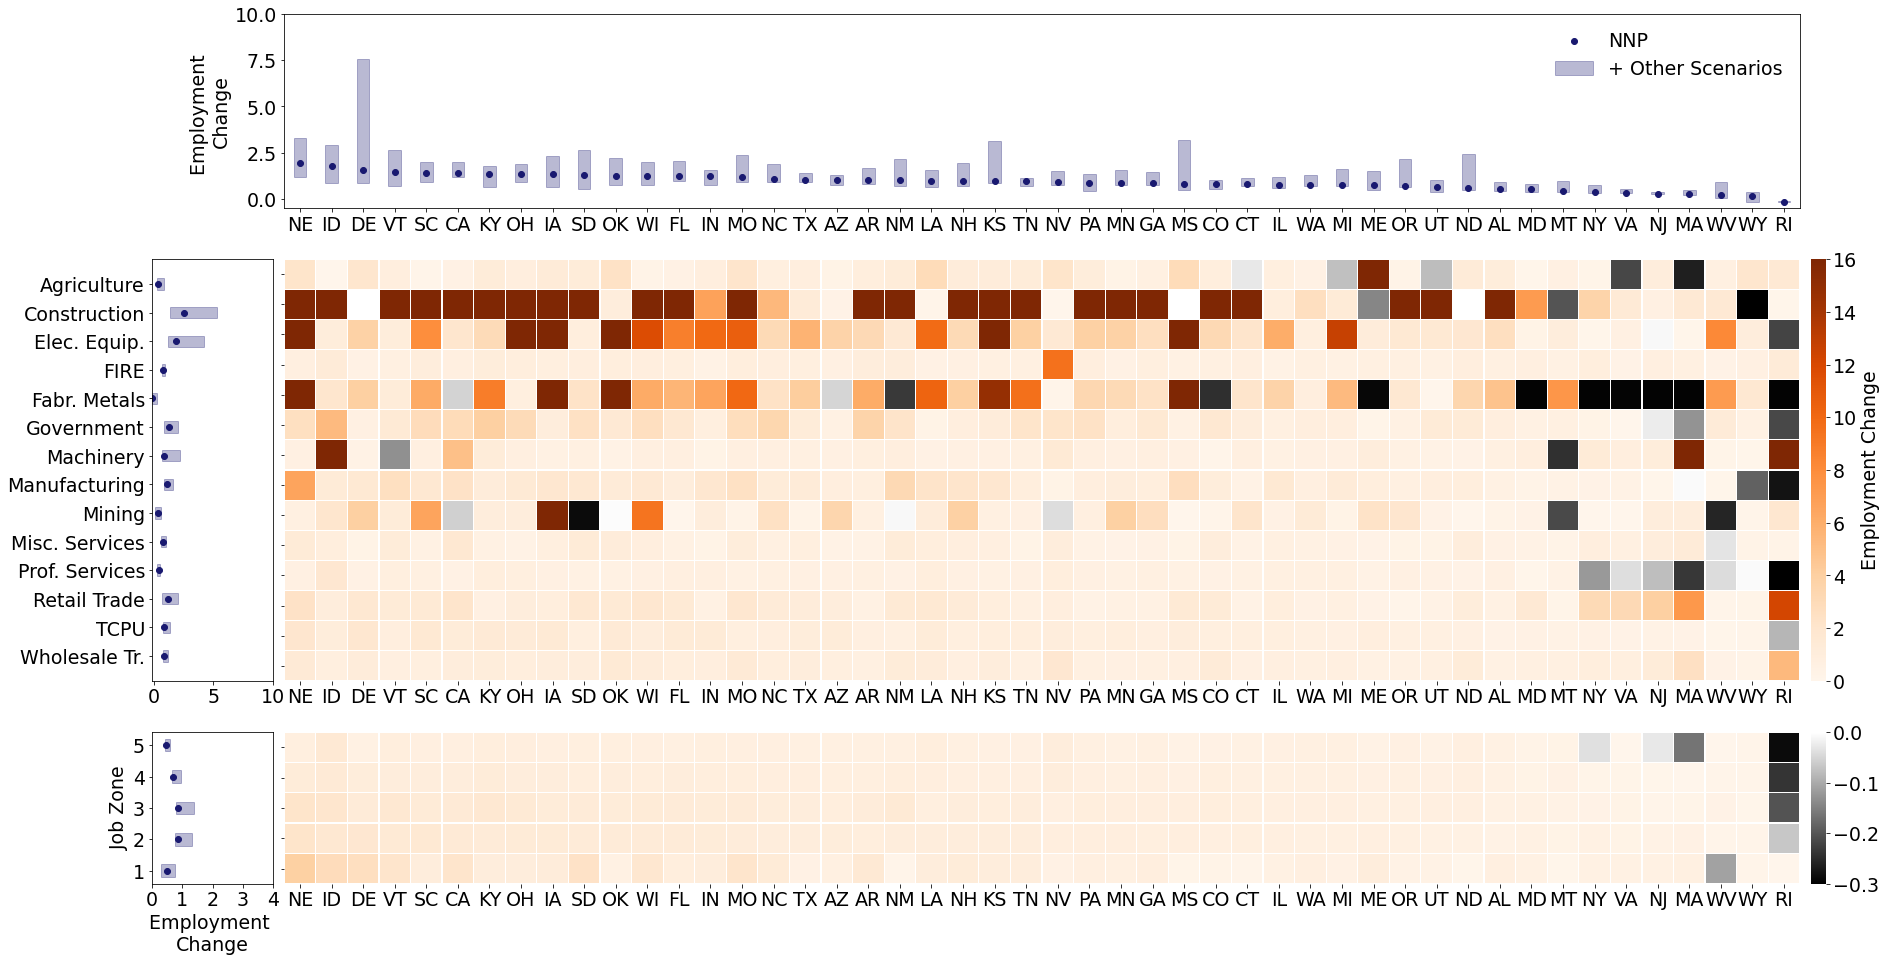

In [23]:
matplotlib.rcParams["font.size"] = 19
fig, axes = plt.subplots(3,3,figsize=(30,16),gridspec_kw={'width_ratios':[0.08,1,0.01],'height_ratios':[0.46,1,0.36]})
fig.subplots_adjust(wspace=0.02)
width=0.4
M = 3
setticks = ticker.MaxNLocator(M)

# TOP BAR: employment growth by state
scen_index = mid_case_list.index(mid_scen)
axes[0,1].scatter(job_data_aggr["state"], job_data_aggr["MismatchMult"], color=color_list[scen_index])
axes[0,1].bar(job_data_comp_pivot.index, job_data_comp_pivot["top"], width, bottom=job_data_comp_pivot["min"],color=color_list[scen_index],alpha=0.3,edgecolor=color_list[scen_index])
if "95" not in mid_scen:
    mid_name_print="NNP"
elif "2050" in mid_scen:
    mid_name_print = "95% by 2050"
else:
    mid_name_print = "95% by 2035"
axes[0,1].legend([mid_name_print,"+ Other Scenarios"],frameon=False)
axes[0,1].set_xlim([-0.5,47.5])
axes[0,1].set_ylabel('Employment \nChange')
#axes[0,1].set_yscale('log')
if "2050" in mid_scen:
    axes[0,1].set_ylim([-0.5,20])
elif "2035" in mid_scen:
    axes[0,1].set_ylim([-0.5,90])
else:
    axes[0,1].set_ylim([-0.5,10])


# MIDDLE BAR: employment growth by JEDI sector
natl_jedi_plot = natl_jedi.rename(index={"Electrical Equipment":"Elec. Equip.", "Fabricated Metals":"Fabr. Metals",
                       "Professional Services":"Prof. Services","Wholesale Trade":"Wholesale Tr."})
axes[1,0].barh(natl_jedi_plot.index,natl_jedi_plot["top"],width, left=natl_jedi_plot["min"],color=color_list[scen_index],alpha=0.3,edgecolor=color_list[scen_index])
axes[1,0].scatter(natl_jedi_plot["mid_case"],natl_jedi_plot.index,color=color_list[scen_index])
#axes[1,0].set_xlim([-0.5,10])
if "2050" in mid_scen or "2035" in mid_scen:
    axes[1,0].set_xticks(np.arange(0, 20.5, 5))
else:
    axes[1,0].set_xticks(np.arange(0, 10.5, 5))
# TOP HEATMAP: employment growth by state and JEDI sector (mid case only)
data_plot = job_data_jedi_pivot.transpose().loc[:,order_states]
data_plot = data_plot.rename(index={"Electrical Equipment":"Elec. Equip.", "Fabricated Metals":"Fabr. Metals",
                       "Professional Services":"Prof. Services","Wholesale Trade":"Wholesale Tr."})
sns.axes_style("ticks")
ax2 = axes[1,2].twinx()
sns.heatmap(data_plot,cmap=cmap, vmin=0, vmax=16,linewidths=0.2, linecolor='white',ax=axes[1,1],cbar_ax=ax2,zorder=-1)
sns.heatmap(data_plot, mask=data_plot > 0, cmap=cmap1,vmin=-0.3,vmax=0,linewidths=0.2, 
            linecolor='white',ax=axes[1,1],cbar=False,zorder=-1)
axes[1,1].set_ylabel(None)
axes[1,1].set_xlabel(None)
axes[1,1].set_yticklabels([])
plt.xticks(rotation=0)
ax2.set_ylabel('Employment Change')
axes[1,2].axis('off')


# BOTTOM BAR: employment growth by job zone 
axes[2,0].barh(natl_jobzone.index,natl_jobzone["top"],width, left=natl_jobzone["min"],color=color_list[scen_index],alpha=0.3,edgecolor=color_list[scen_index])
axes[2,0].scatter(natl_jobzone["mid_case"],natl_jobzone.index,color=color_list[scen_index])
axes[2,0].set_ylabel('Job Zone')
axes[2,0].set_yticks(np.arange(1, 5.1, 1))
#axes[2,0].set_xlim([0,natl_jobzone["max"].max()*1.05])
#axes[2,0].set_xlim([-0.5,5.5])
axes[2,0].set_xlabel('Employment \nChange')
axes[2,0].set_xticks(np.arange(0, 4.1, 1))
# BOTTOM HEATMAP: employment growth by state and job zone (mid case only)
data_plot2 = job_data_zone_pivot.transpose()[::-1].loc[:,order_states]
sns.heatmap(data_plot2,cmap=cmap, vmin=0, vmax=16,linewidths=0.2, linecolor='white',ax=axes[2,1],cbar=False)#,norm=LogNorm())
sns.heatmap(data_plot2, mask=data_plot2 > 0, cmap=cmap1,vmin=-0.3,vmax=0,linewidths=0.2, 
            linecolor='white',ax=axes[2,1],cbar_ax=axes[2,2])
#axes[2,1].scatter(np.arange(48)+0.5,5.5-job_data_all_maxzone.loc[order_states]["high_zone"],color="black",marker='x',linewidth=4,s=100)
#data_hatch2 = this_zone_comp[::-1].loc[:,order_states]
#zm = np.ma.masked_outside(data_hatch2.values, 0.5,1)
#axes[2,1].pcolor(np.arange(len(data_hatch2.columns)+1), np.arange(len(data_hatch2.index)+1), 
#                 zm, hatch='//',ec="black",alpha=0.1)

axes[2,1].set_yticklabels([])
axes[2,1].set_ylabel(None)
axes[2,1].set_xlabel(None)
axes[2,1].set_yticklabels(axes[2,1].get_yticklabels(), rotation=0)
axes[2,2].yaxis.set_ticks_position('right')

axes[0,0].axis('off')
axes[0,2].axis('off')
plt.savefig('Emp_change_v6.2_'+mid_scen+'_5.png',bbox_inches='tight',dpi=600)